## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer:

In [221]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import sklearn train_test_split
from sklearn.model_selection import train_test_split, cross_val_score

# Import sklearn logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [222]:
data=pd.read_csv('../4_01-lab-classification-model-comparison/data.csv',delimiter='\t')
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer:

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [223]:
data.shape

(4184, 56)

In [224]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

In [225]:
data.isnull().sum().sum()

0

In [226]:
data.describe(include='all')

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,NaN,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,NaN,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,NaN,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,NaN,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,NaN,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000


In [227]:
data['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

1 = Right Handed,
2 = Left Handed,
3 = Both Handed,
0 = No Hand / No Response

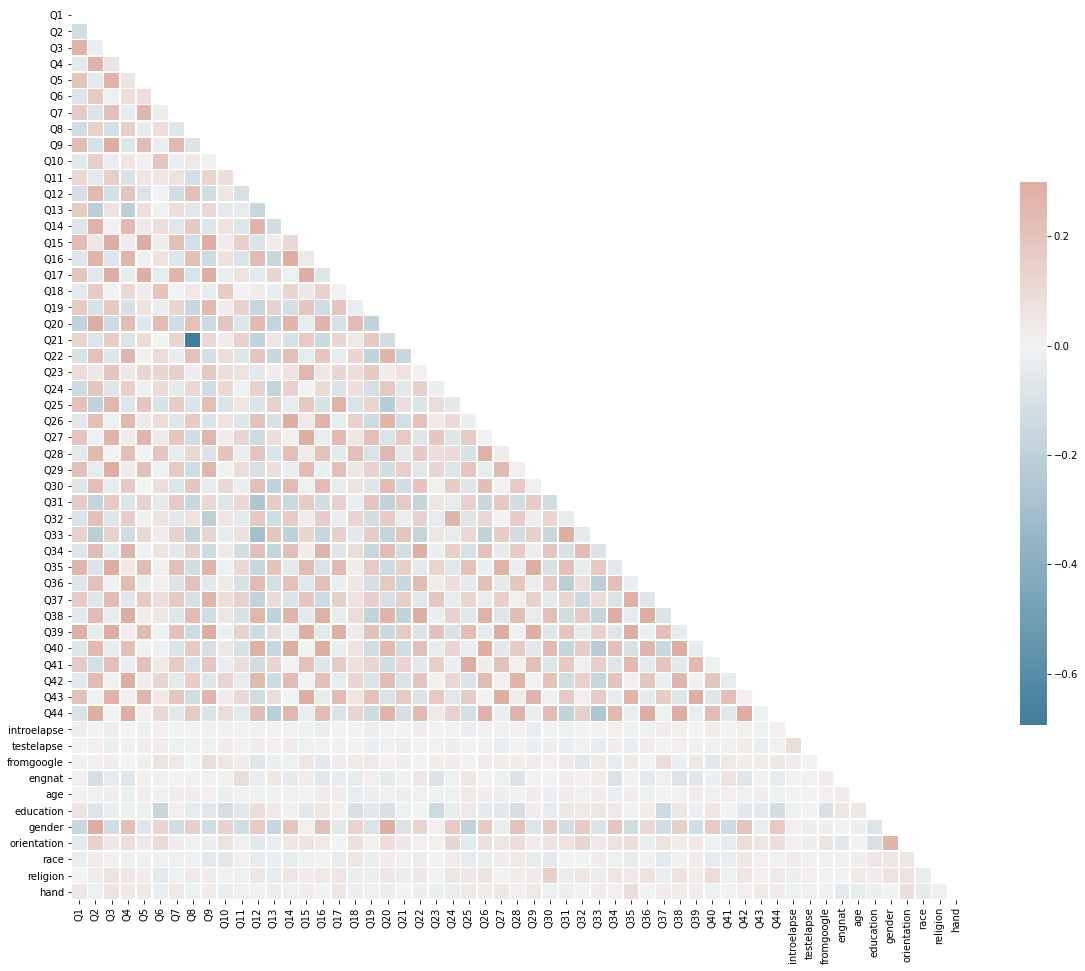

In [228]:
corr=data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [229]:
color_series = data['hand'].map({0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'})
color_series

0       yellow
1        green
2         blue
3         blue
4       yellow
         ...  
4179     green
4180     green
4181     green
4182     green
4183     green
Name: hand, Length: 4184, dtype: object

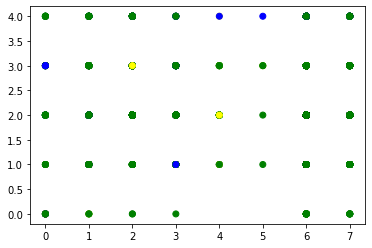

In [230]:
plt.scatter(data['race'], data['education'], color=color_series);

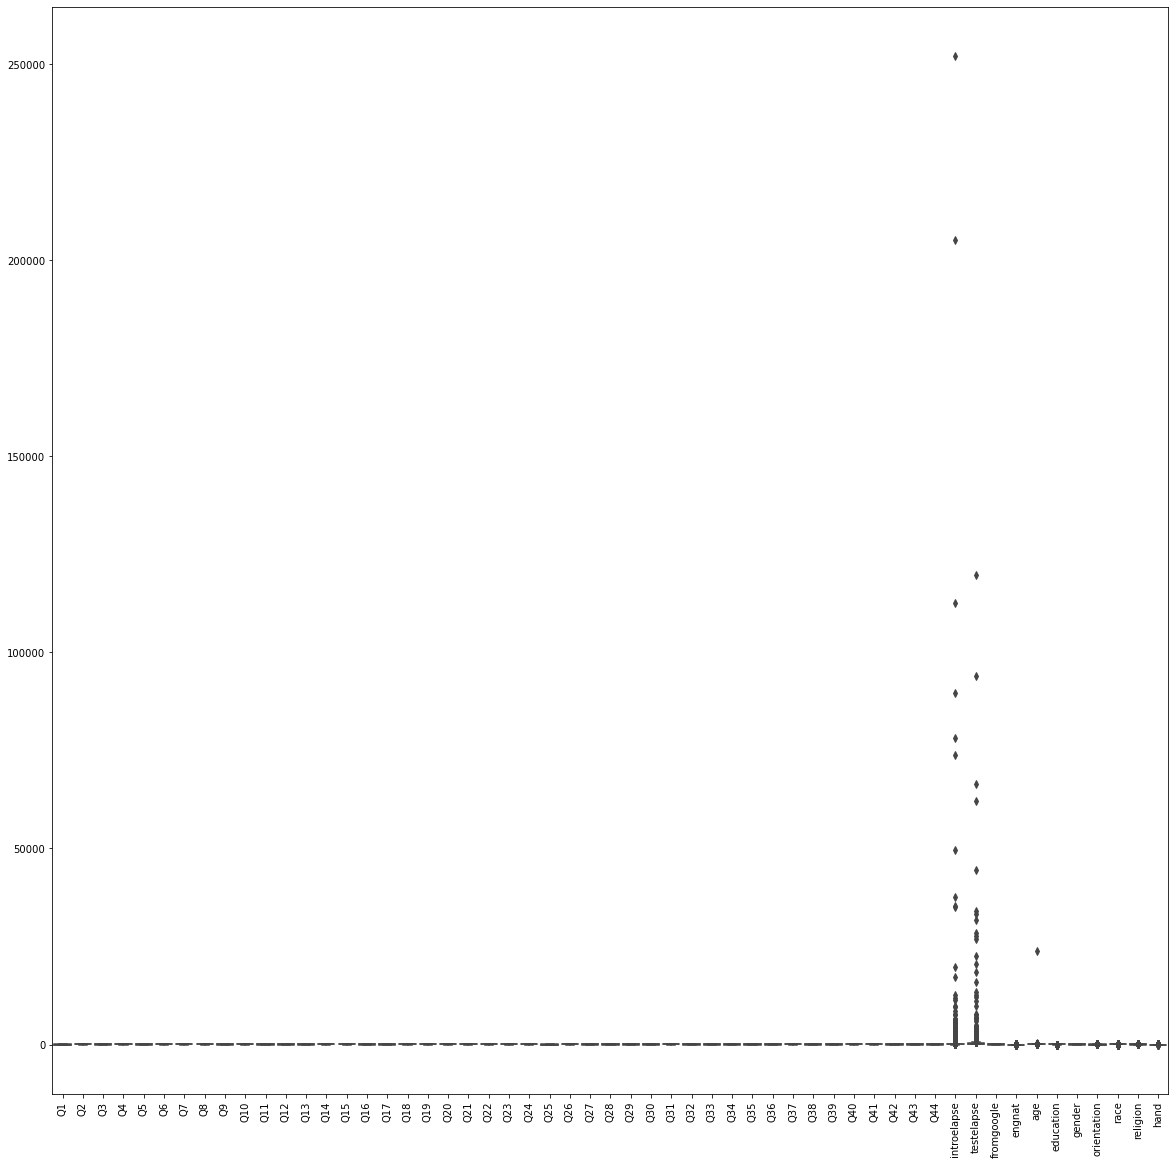

In [231]:
plt.subplots(figsize=(20,20))
sns.boxplot(data=data);
plt.xticks(rotation=90);

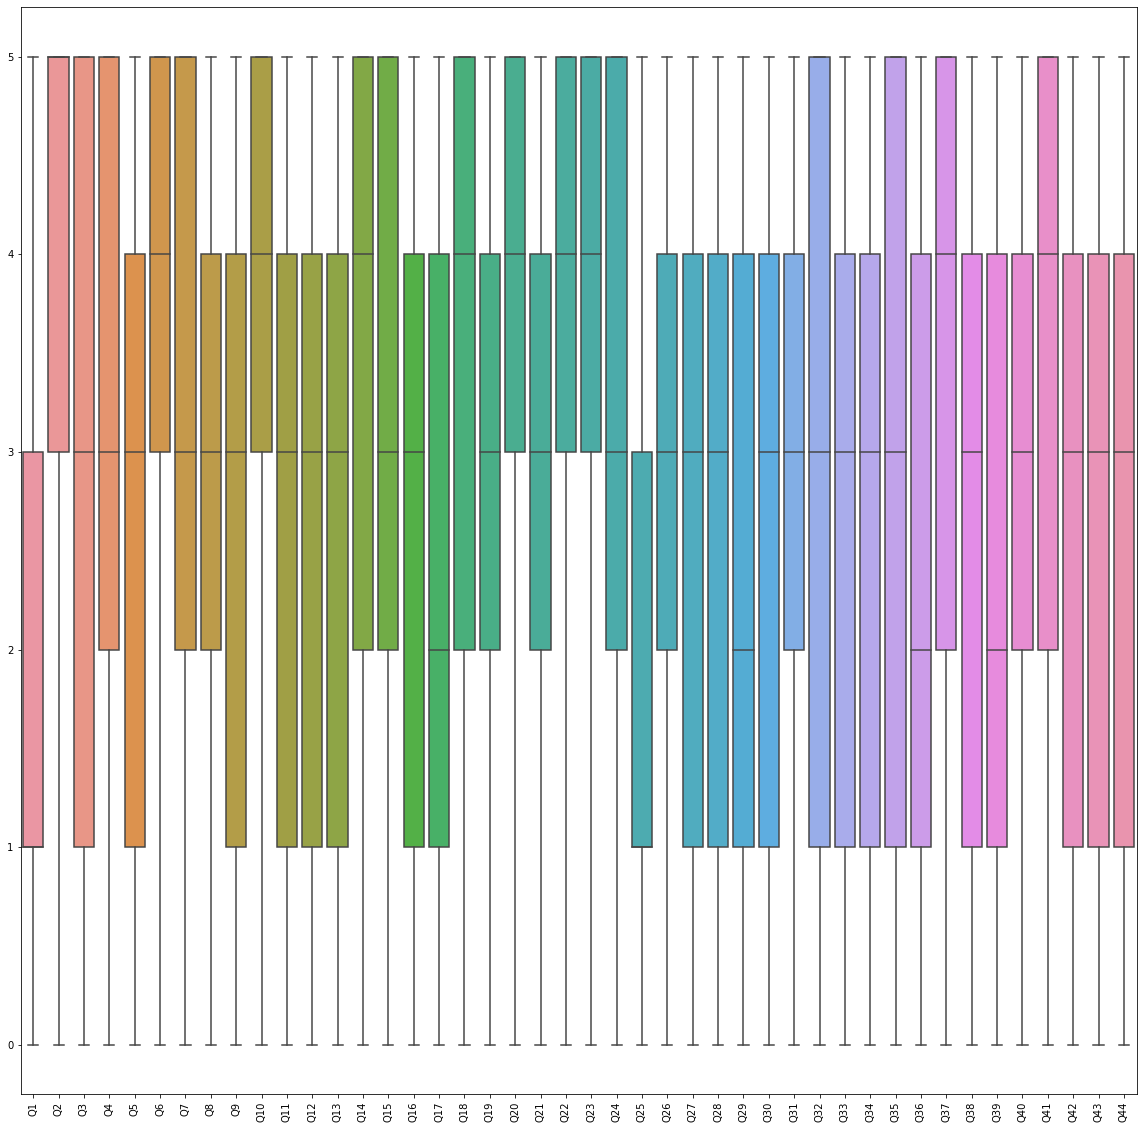

In [232]:
plt.subplots(figsize=(20,20))
sns.boxplot(data=data[list(data.columns[range(0,44)])]);
#sns.swarmplot(data=data[list(data.columns[range(0,44)])]);
plt.xticks(rotation=90);

In [233]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers=((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outliers

<ipython-input-233-2c7dbae91f60>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
<ipython-input-233-2c7dbae91f60>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()


Q1                0
Q10               0
Q11               0
Q12               0
Q13               0
Q14               0
Q15               0
Q16               0
Q17               0
Q18               0
Q19               0
Q2                0
Q20               0
Q21               0
Q22               0
Q23               0
Q24               0
Q25               0
Q26               0
Q27               0
Q28               0
Q29               0
Q3                0
Q30               0
Q31               0
Q32               0
Q33               0
Q34               0
Q35               0
Q36               0
Q37               0
Q38               0
Q39               0
Q4                0
Q40               0
Q41               0
Q42               0
Q43               0
Q44               0
Q5                0
Q6                0
Q7                0
Q8                0
Q9                0
age             421
country           0
education        51
engnat         1054
fromgoogle        0
gender            0


In [234]:
data=data[data['age']<123]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4181 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4181 non-null   int64 
 1   Q2           4181 non-null   int64 
 2   Q3           4181 non-null   int64 
 3   Q4           4181 non-null   int64 
 4   Q5           4181 non-null   int64 
 5   Q6           4181 non-null   int64 
 6   Q7           4181 non-null   int64 
 7   Q8           4181 non-null   int64 
 8   Q9           4181 non-null   int64 
 9   Q10          4181 non-null   int64 
 10  Q11          4181 non-null   int64 
 11  Q12          4181 non-null   int64 
 12  Q13          4181 non-null   int64 
 13  Q14          4181 non-null   int64 
 14  Q15          4181 non-null   int64 
 15  Q16          4181 non-null   int64 
 16  Q17          4181 non-null   int64 
 17  Q18          4181 non-null   int64 
 18  Q19          4181 non-null   int64 
 19  Q20          4181 non-null 

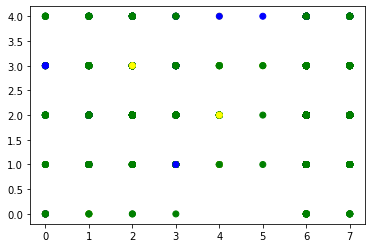

In [235]:
color_series = data['hand'].map({0: 'red', 1: 'green', 2: 'blue', 3: 'yellow'})
plt.scatter(data['race'], data['education'], color=color_series);

In [236]:
data['hand'].value_counts()

1    3541
2     452
3     178
0      10
Name: hand, dtype: int64

---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: Classification because there are only 2 possible responses, whether or not the person is left-handed.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: We would want to standardise them to put them on the same scale. For example, when we want to use $k$-nearest neighbours, we are looking for observations that are close to one another and if we have two variables that are on very different scales, then one variable will seem closer than the other.

### 7. Give an example of when we might not standardize our variables.

Answer: When our variables are already on the same scale or if we are using a linear regression.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer: No because they are already on the same scale.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: We want to use  𝑘 -nearest neighbors to predict whether or not a person is left-handed. Currently, we've four categories, as such, we need to binarise the categories. I will convert those that are left handed to 1 and everything else to 0

In [237]:
data.rename(columns={'hand':'left_hand'},inplace=True)

In [238]:
data['left_hand']=data['left_hand'].map({1:int(0),2:int(1),3:int(0)})

In [239]:
data['left_hand']=data['left_hand'].astype('bool').astype('int')

In [240]:
data['left_hand'].value_counts()

0    3719
1     462
Name: left_hand, dtype: int64

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: Having an even number of categories may lead us to having ties when predicting a discrete output. For example, maybe two nearest neighbors are right-handed and two nearest neighbors are left-handed. Any prediction in this case would be arbitrary, because it's equally likely (based on the data) for that individual to be left- or right-handed. It is almost always a good option to pick a value for $k$ that is not divisible by the number of categories you seek to predict!

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [241]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'left_hand'],
      dtype='object')

In [242]:
X = data.drop(columns=['introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'left_hand'], axis = 1)

y = data['left_hand']

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
k_3 = KNeighborsClassifier(n_neighbors = 3)
k_3.fit(X_train, y_train)

k_5 = KNeighborsClassifier(n_neighbors = 5)
k_5.fit(X_train, y_train)

k_15 = KNeighborsClassifier(n_neighbors = 15)
k_15.fit(X_train, y_train)

k_25 = KNeighborsClassifier(n_neighbors = 25)
k_25.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer: There is default regularization.

penalty = 'l2' indicates the L2 or Ridge penalty.
C = 1.0 indicates that the inverse of our regularization strength is 1. Note that $C = \frac{1}{\alpha} \Rightarrow 1 = \frac{1}{\alpha} \Rightarrow \alpha = 1$.
Our loss function would then include add $\alpha\sum_{i=1}^p \hat{\beta}_i^2$ as a penalty, where $\alpha = 1$.

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: An example of when I would standardize in logistic regression is if I wanted to implement regularization. If I did not regularize, I would improperly penalize coefficients simply for the scale of their variables.
An example of when I would not standardize in logistic regression is when I want to maintain interpretability of my variables or if my variables are already on the same scale.

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [244]:
from sklearn.linear_model import LogisticRegression
lasso_1 = LogisticRegression(penalty = 'l2', C = 1.0)
lasso_1.fit(X_train, y_train)

lasso_10 = LogisticRegression(penalty = 'l2', C = 0.1)
lasso_10.fit(X_train, y_train)

ridge_1 = LogisticRegression(penalty = 'l2', C = 1.0)
ridge_1.fit(X_train, y_train)

ridge_10 = LogisticRegression(penalty = 'l2', C = 0.1)
ridge_10.fit(X_train, y_train)

lasso_1.coef_

/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhiyuantoh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

array([[ 0.01452111,  0.01612703, -0.0012251 , -0.02402687,  0.04471634,
        -0.00025312, -0.00641749, -0.16972037, -0.02732136,  0.03717439,
        -0.00445344, -0.00625793, -0.02302845, -0.0022522 , -0.02657849,
         0.07934398, -0.00947328, -0.01011485, -0.02420338, -0.04422234,
        -0.0220366 , -0.06744625, -0.04766118, -0.00572799,  0.04795279,
         0.13217269,  0.05712309, -0.04194217,  0.02509622,  0.03616332,
        -0.01158535,  0.01349839, -0.02016183, -0.0461201 ,  0.02349264,
        -0.02134008, -0.03325694,  0.06503901, -0.06391573, -0.07834472,
        -0.04901234, -0.04814692, -0.09970653, -0.01150259]])

In [245]:
lasso_10.coef_

array([[ 0.01426334,  0.01563614, -0.00147423, -0.02336749,  0.04393681,
        -0.00060543, -0.00662712, -0.16397254, -0.02715168,  0.03596044,
        -0.00424099, -0.00647582, -0.02270303, -0.00302111, -0.02617499,
         0.07784698, -0.00919128, -0.01008245, -0.02408954, -0.04336549,
        -0.01815108, -0.06595721, -0.04685535, -0.00571552,  0.04687144,
         0.12933817,  0.04706397, -0.0409113 ,  0.02438145,  0.03559781,
        -0.01141491,  0.01314189, -0.01988572, -0.04539504,  0.02287318,
        -0.02129798, -0.03283412,  0.06327066, -0.06297197, -0.07578061,
        -0.0484131 , -0.04742083, -0.08974773, -0.01143334]])

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer: No, I do not. We are predicting whether or not someone is left-handed based on a series of psychological factors. Psychological factors are probably not very likely to predict the hand with which someone writes.

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

In [246]:
print("k-nearest neighbors training accuracy with k = 3: " + str(k_3.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 3: " + str(k_3.score(X_test, y_test)))

print("k-nearest neighbors training accuracy with k = 5: " + str(k_5.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 5: " + str(k_5.score(X_test, y_test)))

print("k-nearest neighbors training accuracy with k = 15: " + str(k_15.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 15: " + str(k_15.score(X_test, y_test)))

print("k-nearest neighbors training accuracy with k = 25: " + str(k_25.score(X_train, y_train)))
print("k-nearest neighbors testing accuracy with k = 25: " + str(k_25.score(X_test, y_test)))

print("logistic regression training accuracy with LASSO penalty, alpha = 1: " + str(lasso_1.score(X_train, y_train)))
print("logistic regression testing accuracy with LASSO penalty, alpha = 1: " + str(lasso_1.score(X_test, y_test)))

print("logistic regression training accuracy with LASSO penalty, alpha = 10: " + str(lasso_10.score(X_train, y_train)))
print("logistic regression testing accuracy with LASSO penalty, alpha = 10: " + str(lasso_10.score(X_test, y_test)))

print("logistic regression training accuracy with Ridge penalty, alpha = 1: " + str(ridge_1.score(X_train, y_train)))
print("logistic regression testing accuracy with Ridge penalty, alpha = 1: " + str(ridge_1.score(X_test, y_test)))

print("logistic regression training accuracy with Ridge penalty, alpha = 10: " + str(ridge_10.score(X_train, y_train)))
print("logistic regression testing accuracy with Ridge penalty, alpha = 10: " + str(ridge_10.score(X_test, y_test)))

k-nearest neighbors training accuracy with k = 3: 0.9033492822966507
k-nearest neighbors testing accuracy with k = 3: 0.8546845124282982
k-nearest neighbors training accuracy with k = 5: 0.8905901116427433
k-nearest neighbors testing accuracy with k = 5: 0.875717017208413
k-nearest neighbors training accuracy with k = 15: 0.8902711323763955
k-nearest neighbors testing accuracy with k = 15: 0.887189292543021
k-nearest neighbors training accuracy with k = 25: 0.8902711323763955
k-nearest neighbors testing accuracy with k = 25: 0.887189292543021
logistic regression training accuracy with LASSO penalty, alpha = 1: 0.8902711323763955
logistic regression testing accuracy with LASSO penalty, alpha = 1: 0.887189292543021
logistic regression training accuracy with LASSO penalty, alpha = 10: 0.8902711323763955
logistic regression testing accuracy with LASSO penalty, alpha = 10: 0.887189292543021
logistic regression training accuracy with Ridge penalty, alpha = 1: 0.8902711323763955
logistic regr

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer: Remember that we overfit when our model is too closely matched to the training data and thus generalizes poorly to (held-out) testing data. Evidence of this is when our training score is better than our testing score. In this case, we see that our training score is better than our testing score when $k = 3$ and $k = 5$.

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer: As $k$ increases, our bias increases and our variance decreases.
As $k$ decreases, our bias decreases and our variance increases.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: We can increase $k$ in order to decrease variance.
We can pick a less flexible model than $k$-nearest neighbors. One example of that would be logistic regression. (Logistic regression makes more simplifying assumptions than $k$-nearest neighbors - for example, linear relationship between X and logit of Y.)
We can reduce the number of questions we include as predictors. (For example, maybe some of our questions are correlated with one another, which adds unnecessary complexity to our model.)

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: All of our logistic regression models have identical training scores and identical testing scores. There is no evidence of overfitting from these models, because our training scores are worse than our testing scores.

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer: As $C$ increases, we regularize less. If we regularize less, then our variance increases and our bias decreases.
As $C$ decreases, we regularize more. If we regularize more, then our variance decreases and our bias increases.

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer: As we saw above, by changing the hyperparameter $C$ (or equivalently changing $\alpha$), we are getting the same model. This means that either our regularization has no effect on our model or that our regularization has such a strong effect that even regularizing a little bit would basically push our coefficients to zero.

In this case, we mentioned above that our $X$ variables probably aren't very valuable in trying to predict $Y$. Because of this, it is not surprising that even a little bit of regularization (i.e. $\alpha = 1$) has a really substantial effect on the fit of our models. The fact that regularizing will give you the same answer provides more support to the claim that our $X$ variables are relatively worthless when trying to predict left-handedness.

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer: Manually remove features from my model.
Increase the regularization strength and/or consider using LASSO regularization if not already doing so.
Attempt to gather more data, although this is likely to be an expensive and time-consuming approach to reducing variance.

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer: I would prefer to use logistic regression. A logistic regression model would allow us to understand the effect of psychological features on left-handedness. Specifically, we can estimate coefficients that tell us the impact of a one-unit change in psychological factors on whether or not people are left-handed. $k$-nearest neighbors does not provide us with a similar way to understaand how individual features affect left-handedness.

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

Answer:

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer: Of the models I ran, I would either select my $k$-nn model with $k = 5$ or I would select a logistic regression model.

My $k$-nn model with $k = 5$ is my $k$-nn model that, based on testing/training accuracy, seems to best balance bias and variance.
All of my logistic regression models are performing at the same level, so I could really pick any of them.
I would probably select my logistic regression model. Our accuracy is going to be high because we can always just predict "not left-handed" and we'll be right like 90% of the time. If I want to understand what (if any) features predict left-handedness, logistic regression is better for this type of problem than $k$-nearest neighbors. (If I cared about the best predictions instead of understanding how things work, I might be likelier to pick $k$-nn.)

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

Answer: My questions from the beginning were:

As one's response to Q1 increases, are people more or less likely to be left-handed?
Does the distribution of handedness vary based one's response to Q1?
Which question (Q1-Q44) has the highest association with left-handedness?
I select my ridge_10 model.

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)